In [58]:
#cargando las librerías a utilizar
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
#cargamos los datos de entrada
data = pd.read_csv("articulos_ml.csv")
#visualizamos cuántas dimensiones y registros contiene
data.shape

(163, 8)

In [60]:
#son 163 registros con 8 columnas. Se muestran los primeros registros
data.head(7)

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,Regresión Lineal Simple con Python,https://www.jacobsoft.com.mx/es_mx/regresion-l...,1829,2,4.0,10,302,2000
2,Regresión Lineal en español con Python,https://www.aprendemachinelearning.com/regresi...,1788,2,3.0,6,340,2100
3,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
4,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
5,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
6,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,20000


In [61]:
# Mostramos las estadísticas de nuestros datos
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,163.000000,163.000000,131.00000,163.000000,163.000000,163.000000
mean,1808.263804,9.644172,8.70229,3.723926,100.858896,26526.282209
std,1134.850895,46.986691,13.05768,3.437786,116.283544,41047.551331
min,250.000000,0.000000,0.00000,1.000000,1.000000,0.000000
25%,991.000000,3.000000,2.00000,1.500000,31.500000,2800.000000
50%,1718.000000,5.000000,6.00000,3.000000,62.000000,16390.000000
75%,2367.500000,7.000000,12.00000,5.000000,127.000000,35196.000000
max,8401.000000,600.000000,104.00000,22.000000,1002.000000,350000.000000


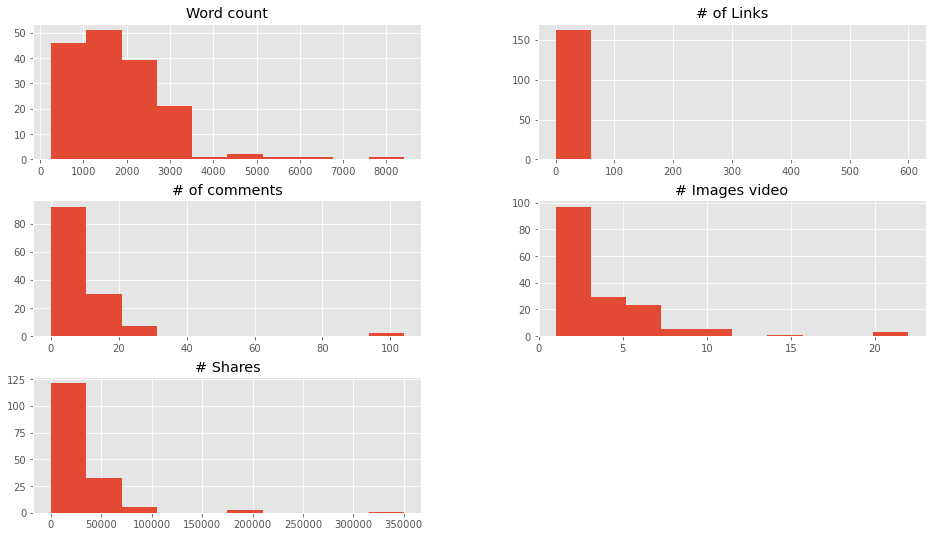

In [62]:
# Visualizamos las caraterísticas de entrada
data.drop(['Title','url', 'Elapsed days'],1).hist()
plt.show()

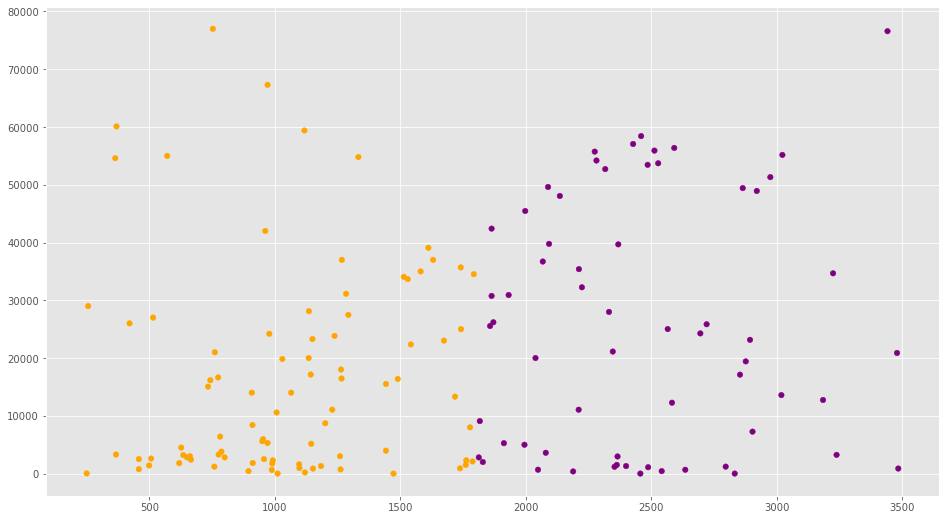

In [63]:
# Vamos a recortar los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3500
# y en el eje Y: entre 0 y 80000
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]
 
colores=['purple','orange']
tamanios=[30,60]
 
f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values
 
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

Coeficientes:  [5.62254888]
Término independiente:  11047.519864575956
Error Cuadrado Medio: 370466167.9481
Accuracy: 0.0533


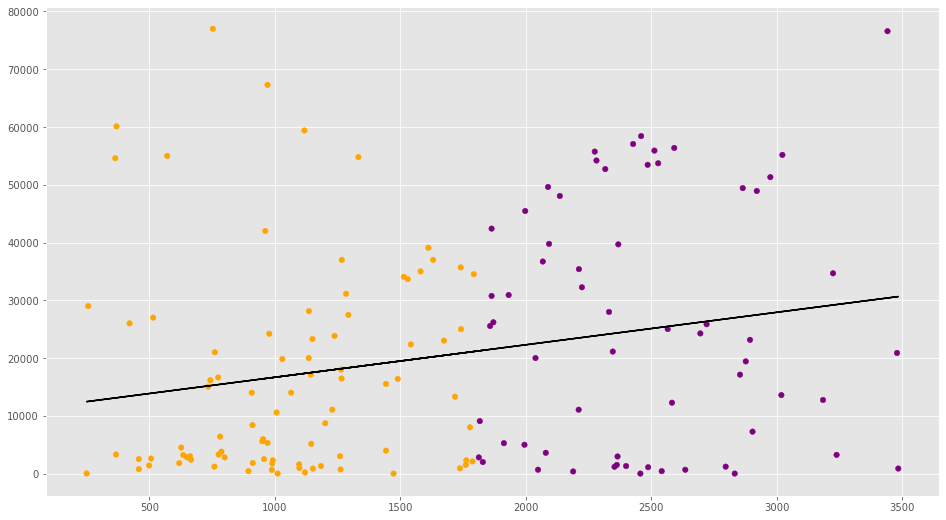

In [64]:

# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coeficientes: ', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Término independiente: ', regr.intercept_)
# Error Cuadrado Medio
print("Error Cuadrado Medio: %.4f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Accuracy: %.4f' % r2_score(y_train, y_pred))

#La recta roja muestra la linea de regresión calculada para los valores predecidos.
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.plot(X_train, y_pred, color = 'black')
plt.show()

In [69]:
# Quiero predecir cuántos "Shares" se obtienen por un artículo con 2100 palabras,
# según nuestro modelo, hacemos:
y_ns = regr.predict([[2100]])
print('Número de shares a obtener: ',int(y_ns))

Número de shares a obtener:  22854
